In [294]:
#visualisasi
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import pandas as pd
import re
# % matplotlib inline

#prerocessing
from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

from nltk.stem import WordNetLemmatizer

import nltk
# nltk.download('all')
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#encoder
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split

#feture engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#modeling
from sklearn.svm import SVC

#evaluation model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estika.ginting.ROOT\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [295]:
df_data = pd.read_csv('data.csv', encoding='Latin-1')

In [296]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


# **Pre-Processing Data**

### **Cleaning Data missing**

In [297]:
# Cek jumlah kolom dan total data
df_data.shape

(13169, 13)

In [298]:
#Cek total duplikat data
df_data.duplicated().sum()

125

In [299]:
df_data = df_data.drop_duplicates()
df_data.shape

(13044, 13)

In [300]:
#cek missing values
df_data.isna().sum()/df_data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [301]:
new_data_clean = df_data.dropna()
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

## **Lowe/Upper Case**

In [302]:
new_data_clean ['result_text_clean']= new_data_clean['Tweet'].apply(lambda x: str(x).lower())
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  
0  - disaat semua cowok berusaha melacak perhatia...  
1  rt user: user siapa yang telat ngasih tau elu?...  
2  41. kadang aku berfikir, kenapa aku tetap perc...  
3  user user aku itu aku\n\nku tau matamu sipit t...  
4  user user kaum cebong kapir udah keliatan dong...

In [303]:
print ('before :', new_data_clean['Tweet'][1])
print ('----------------------------------')
print ('after :', new_data_clean['result_text_clean'][11])

before : RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'
----------------------------------
after : user user user user banci kaleng malu ga bisa jawab pertanyaan kami dari 2 hari lalu.... nyungsep koe user url


## **Cleaning Data**

In [304]:
def data_cleansing (text):
    # Hilangkan karakter non-alfanumerik kecuali spasi
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Hilangkan text xX & A-F & 0-9
    text = re.sub(r'[xX][0-9a-fA-F]{2}', '', text)
    text = re.sub(r'(?<=\D)(?=\d)|(?<=\d)(?=\D)', ' ', text)
    # Memeriksa apakah terdapat angka di awal atau di akhir kalimat
    text = re.sub(r'^(\d+)|(\d+)$', r'\1\2 ', text)
    # Menambahkan spasi antara digit dan karakter non-digit
    text = re.sub(r'(\d+)(\D+)', r'\1 \2', text)
    # Pisahkan kata-kata dengan spasi tunggal
    text = re.sub(r'\s+', ' ', text)
    # Menhapus kata "user" yang berulang
    text = re.sub(r'\b(user\s+)\1+', r'\1', text)
    
    return text

In [305]:
new_data_clean['result_text_clean'] = new_data_clean['result_text_clean'].apply(lambda x: data_cleansing(x))
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  
0   disaat semua cowok berusaha melacak perhatian...  
1  rt user siapa yang telat ngasih tau eluedan sa...  
2  41 kadang aku berfikir kenapa aku tetap percay...  
3  user aku itu akunnku tau matamu sipit tapi dil...  
4  user kaum cebong kapir udah keliatan dongoknya...

In [306]:
print ('before :', new_data_clean['Tweet'][4])
print ('----------------------------------')
print ('after :', new_data_clean['result_text_clean'][4])

before : USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'
----------------------------------
after : user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah


### **Stemming**

In [307]:
start_time = datetime.now()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_data_clean['review_steem'] = new_data_clean['result_text_clean'].apply(lambda x: stemmer.stem(x))
new_data_clean.head()

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

Waktu yang diperlukan: 0:46:13.229481


In [173]:
## **Lemmatization**

In [174]:
# Import modul datetime
from datetime import datetime

# Import modul WordNetLemmatizer dari NLTK
from nltk.stem import WordNetLemmatizer

# Lemmatization menggunakan NLTK
start_time = datetime.now()

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Melakukan lemmatization pada kolom 'result_text_clean' dan menyimpan hasilnya dalam kolom baru 'review_lemmatizer'
new_data_clean['review_lemmatizer'] = new_data_clean['result_text_clean'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

# Menampilkan lima baris pertama dari DataFrame 'new_data_clean'
new_data_clean.head()


Waktu yang diperlukan: 0:00:05.546532


Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau matamu sipit tapi dil...   
4  user kaum cebong kapir udah keliatan dongoknya...   

                                        review_steem  \
0  saat semua cowok usaha lacak perhati gue loe l...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau mata sipit tapi liat ...   
4  user kaum cebong kapir udah liat dongok dari a...   

                                   review_lemmatizer  
0  [ , d, i, s, a, a, t,  , s, e, m, u, a,  , c, ...  
1  [r, t,  , u, s, e, r,  , s, i, a, p, a,  , y, ...  
2  [4, 1,  , k, a, d, a, n, g,  , a, k, u,  , b, ...  
3  [u, s, e, r,  , a, k, u,  , i, t, u,  , a, k, ...  
4  [u, s, e, r,  , k, a, u, m,  , c, e, b, o, n, ...

### **Sastrawi**

In [308]:
factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()
len(list_stopword)

126

In [309]:
stopword = factory.create_stop_word_remover()

new_data_clean['review_stp_sasatrawi'] = new_data_clean['review_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split()))
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau matamu sipit tapi dil...   
4  user kaum cebong kapir udah keliatan dongoknya...   

                                        review_steem  \
0  saat semua cowok usaha lacak perhati gue loe l...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau mata sipit tapi liat ...   
4  user kaum cebong kapir udah liat dongok dari a...   

                                review_stp_sasatrawi  
0   semua cowok usaha lacak perhati gue loe lanta...  
1  rt user siapa  telat ngasih tau eluedan sarap ...  
2  41 kadang aku berfikir  aku tetap percaya  tuh...  
3  user aku  akunnku tau mata sipit  liat  mana  aku  
4  user kaum cebong kapir udah liat dongok  awal ...

### **NLTK**

In [310]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [311]:
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [380]:
print ('before :', new_data_clean['Tweet'][67])
print ('----------------------------------')
print ('after :', new_data_clean['result_text_clean'][67])
print ('after :', new_data_clean['review_steem'][67])
print ('after :', new_data_clean['review_stp_sasatrawi'][67])
print ('after :', new_data_clean['review_stp_nltk'][67])

before : USER USER USER USER USER USER USER Klw ente atheis..ngapain sibuk dgn agama orang...
----------------------------------
after : user klw ente atheisngapain sibuk dgn agama orang
after : user klw ente atheisngapain sibuk dgn agama orang
after : user klw ente atheisngapain sibuk dgn agama orang
after : user klw ente atheisngapain sibuk dgn agama orang


In [ ]:
print ('before :', new_data_clean['Tweet'][4])
print ('----------------------------------')
print ('after :', new_data_clean['result_text_clean'][4])
print ('after :', new_data_clean['review_steem'][4])
print ('after :', new_data_clean['review_stp_sasatrawi'][4])
print ('after :', new_data_clean['review_stp_nltk'][4])

In [341]:
stop = list_stopwords
new_data_clean['review_stp_nltk']= new_data_clean['review_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau matamu sipit tapi dil...   
4  user kaum cebong kapir udah keliatan dongoknya...   

                                        review_steem  \
0  saat semua cowok usaha lacak perhati gue loe l...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau mata sipit tapi liat ...   
4  user kaum cebong kapir udah liat dongok dari a...   

                                review_stp_sasatrawi  \
0   semua cowok usaha lacak perhati gue loe lanta...   
1  rt user siapa  telat ngasih tau eluedan sarap ...   
2  41 kadang aku berfikir  aku tetap percaya  tuh...   
3  user aku  akunnku tau mata sipit  liat  mana  aku   
4  user kaum cebong kapir udah liat dongok  awal ...   

                                     review_stp_nltk  total_char  total_word  
0  cowok usaha lacak perhati gue loe lantas remeh...         138          25  
1  rt user telat ngasih tau eluedan sarap gue gau...         120          21  
2  41 kadang berfikir percaya tuhan jatuh berkali...         254          37  
3                   user akunnku tau mata sipit liat          75          14  
4  user kaum cebong kapir udah liat dongok dongok...          89          14

# **EDA**

In [342]:
# Menghitung panjang karakter setiap baris
new_data_clean['total_char'] = df_data.Tweet.apply(len)

In [343]:
# Membuat total_world untuk menghitung jumlah kata dari setiap baris
new_data_clean['total_word'] = new_data_clean.Tweet.apply(lambda sent: len(sent.split()))

In [344]:
new_data_clean.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  \
0         1        1            0          0   
1         0        0            0          0   
2         0        0            0          0   
3         0        0            0          0   
4         0        0            1          0   

                                   result_text_clean  \
0   disaat semua cowok berusaha melacak perhatian...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau matamu sipit tapi dil...   
4  user kaum cebong kapir udah keliatan dongoknya...   

                                        review_steem  \
0  saat semua cowok usaha lacak perhati gue loe l...   
1  rt user siapa yang telat ngasih tau eluedan sa...   
2  41 kadang aku berfikir kenapa aku tetap percay...   
3  user aku itu akunnku tau mata sipit tapi liat ...   
4  user kaum cebong kapir udah liat dongok dari a...   

                                review_stp_sasatrawi  \
0   semua cowok usaha lacak perhati gue loe lanta...   
1  rt user siapa  telat ngasih tau eluedan sarap ...   
2  41 kadang aku berfikir  aku tetap percaya  tuh...   
3  user aku  akunnku tau mata sipit  liat  mana  aku   
4  user kaum cebong kapir udah liat dongok  awal ...   

                                     review_stp_nltk  total_char  total_word  
0  cowok usaha lacak perhati gue loe lantas remeh...         138          25  
1  rt user telat ngasih tau eluedan sarap gue gau...         120          21  
2  41 kadang berfikir percaya tuhan jatuh berkali...         254          37  
3                   user akunnku tau mata sipit liat          75          14  
4  user kaum cebong kapir udah liat dongok dongok...          89          14

# **Univariate Analysis**

In [345]:
new_data_clean['total_char'].describe()

count    13044.000000
mean       114.124348
std         69.101629
min          4.000000
25%         59.000000
50%        100.000000
75%        152.000000
max        561.000000
Name: total_char, dtype: float64

In [346]:
new_data_clean['total_word'].describe()

count    13044.000000
mean        17.264259
std         10.242584
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         52.000000
Name: total_word, dtype: float64

In [347]:
# Cari nilai minimum
p0 = new_data_clean.total_char.min()

# Cari nilai maksimum
p100 = new_data_clean.total_char.max()

# Cari Quartile 1
q1 = new_data_clean.total_char.quantile(0.25)

# Cari Quartile 2
q2 = new_data_clean.total_char.quantile(0.5)

# Cari Quartile 3
q3 = new_data_clean.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -80.5
Nilai minimum 4
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 291.5
Nilai maksimum 561
Ada outlier dari sisi batas atas


In [348]:
outlier = new_data_clean.loc[new_data_clean['total_char'] >= upper_limit, 'Tweet'].count()
total_rows = new_data_clean.shape[0]

print(f"Jumlah data outlier = {outlier}")
print(f"Presentase jumlah outlier = {(outlier/total_rows*100).round(2)}")

Jumlah data outlier = 24
Presentase jumlah outlier = 0.18


In [349]:
# Cari nilai minimum
p0 = new_data_clean.total_word.min()

# Cari nilai maksimum
p100 = new_data_clean.total_word.max()

# Cari Quartile 1
q1 = new_data_clean.total_word.quantile(0.25)

# Cari Quartile 2
q2 = new_data_clean.total_word.quantile(0.5)

# Cari Quartile 3
q3 = new_data_clean.total_word.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word': -12.0
Nilai minimum 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_word': 44.0
Nilai maksimum 52
Ada outlier dari sisi batas atas


In [350]:
outlier = new_data_clean.loc[new_data_clean['total_word'] >= upper_limit, 'Tweet'].count()
total_rows = new_data_clean.shape[0]

print(f"Jumlah data outlier = {outlier}")
print(f"Presentase jumlah outlier = {(outlier/total_rows*100).round(2)}")

Jumlah data outlier = 118
Presentase jumlah outlier = 0.9


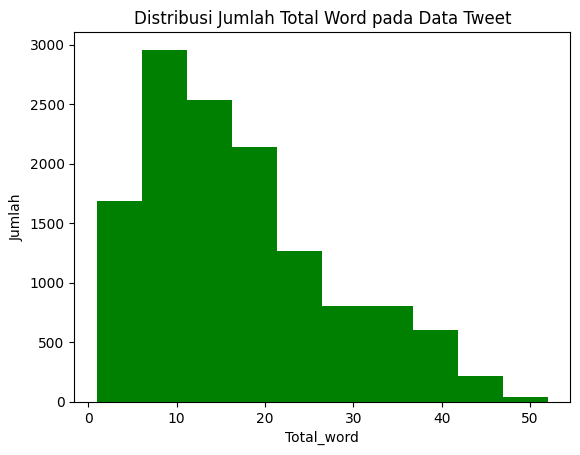

In [351]:
plt.hist(x='total_word', data=new_data_clean, color='green')
plt.xlabel('Total_word')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Total Word pada Data Tweet')
plt.show()

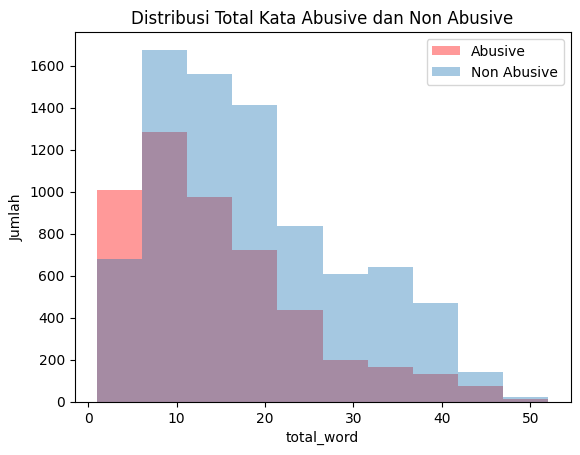

In [352]:
df_HS = new_data_clean['Abusive']==1
df_no_HS = new_data_clean['Abusive']==0

plt.hist(new_data_clean.loc[df_HS,'total_word'], label='Abusive' , alpha=0.4, color ='red')
plt.hist(new_data_clean.loc[df_no_HS,'total_word'], label='Non Abusive' , alpha=0.4)

plt.legend()
plt.ylabel("Jumlah")
plt.xlabel("total_word")
plt.title('Distribusi Total Kata Abusive dan Non Abusive')
plt.show()

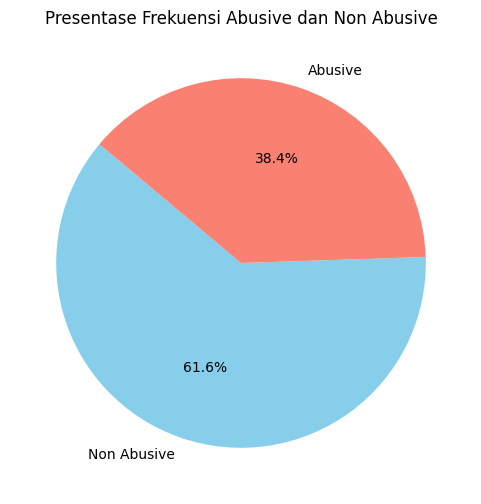

In [353]:
import matplotlib.pyplot as plt

Hate_value_count = new_data_clean['Abusive'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(Hate_value_count, labels=['Non Abusive', 'Abusive'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Presentase Frekuensi Abusive dan Non Abusive')
plt.show()


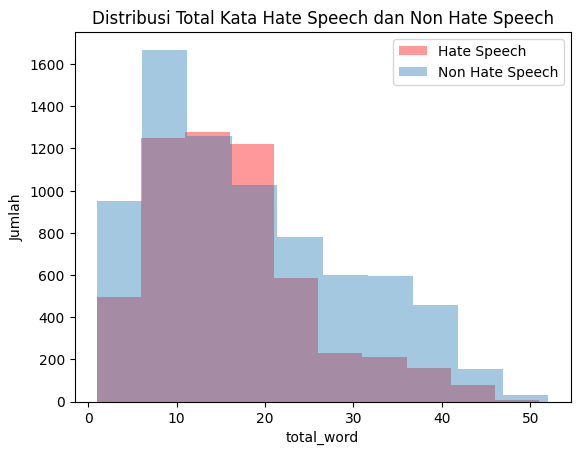

In [358]:
df_HS = new_data_clean['HS']==1
df_no_HS = new_data_clean['HS']==0

plt.hist(new_data_clean.loc[df_HS,'total_word'], label='Hate Speech' , alpha=0.4, color ='red')
plt.hist(new_data_clean.loc[df_no_HS,'total_word'], label='Non Hate Speech' , alpha=0.4)

plt.legend()
plt.ylabel("Jumlah")
plt.xlabel("total_word")
plt.title('Distribusi Total Kata Hate Speech dan Non Hate Speech')
plt.show()

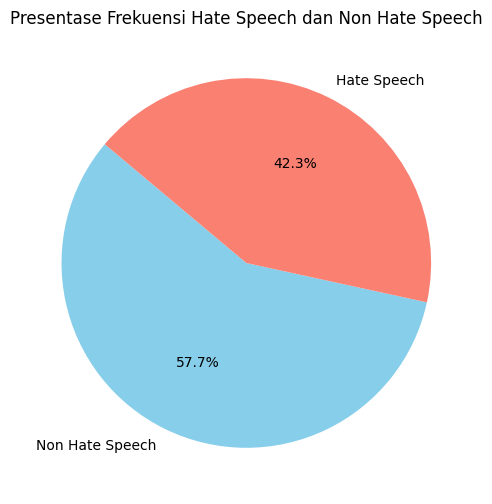

In [359]:
import matplotlib.pyplot as plt

Hate_value_count = new_data_clean['HS'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(Hate_value_count, labels=['Non Hate Speech', 'Hate Speech'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Presentase Frekuensi Hate Speech dan Non Hate Speech')
plt.show()


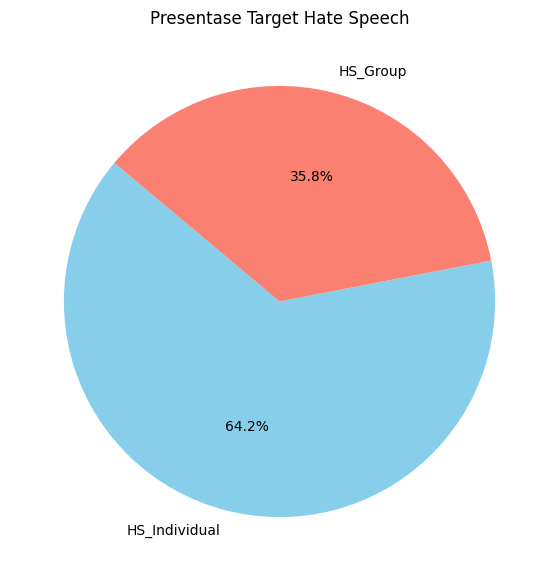

In [360]:
categories = ['HS_Individual', 'HS_Group']
counts = [new_data_clean[category].sum() for category in categories]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Presentase Target Hate Speech')
plt.show()



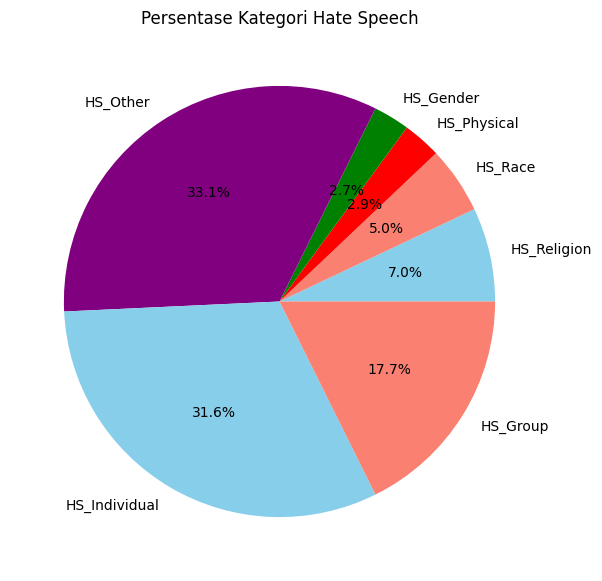

In [381]:

categories = ['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Individual', 'HS_Group']
counts = [df_data[category].sum() for category in categories]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=categories, autopct='%1.1f%%',colors=['skyblue', 'salmon','red', 'green', 'purple'])
plt.title('Persentase Kategori Hate Speech')
plt.show()

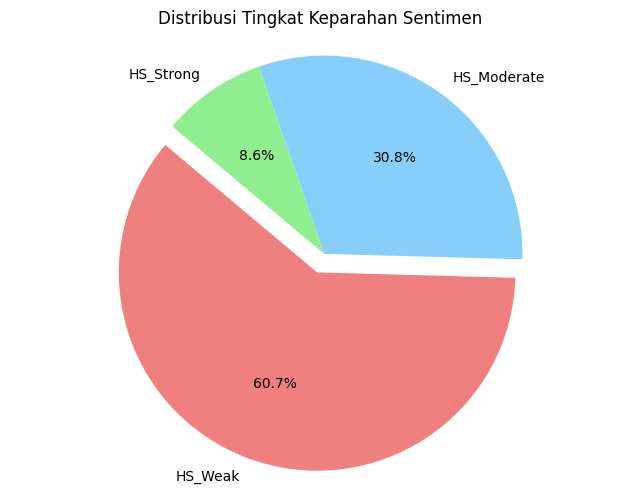

In [362]:
# Menghitung total nilai dari masing-masing kolom
total_weak = new_data_clean['HS_Weak'].sum()
total_moderate = new_data_clean['HS_Moderate'].sum()
total_strong = new_data_clean['HS_Strong'].sum()

# Menyiapkan data untuk diagram lingkaran
sizes = [total_weak, total_moderate, total_strong]
labels = ['HS_Weak', 'HS_Moderate', 'HS_Strong']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0)  # memberikan "pemisahan" pada potongan yang pertama (Weak)

# Membuat diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Tingkat Keparahan Sentimen')
plt.axis('equal')  # Agar diagram lingkaran terlihat sebagai lingkaran
plt.show()


# **Histogram & Filter Sentiment**

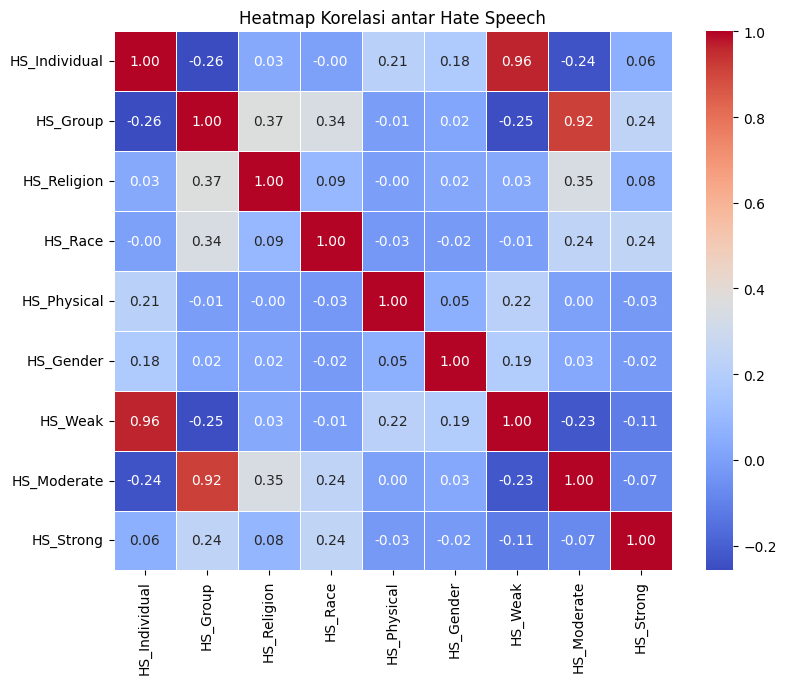

In [363]:

categories = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
correlation = df_data[categories].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Hate Speech')
plt.show()

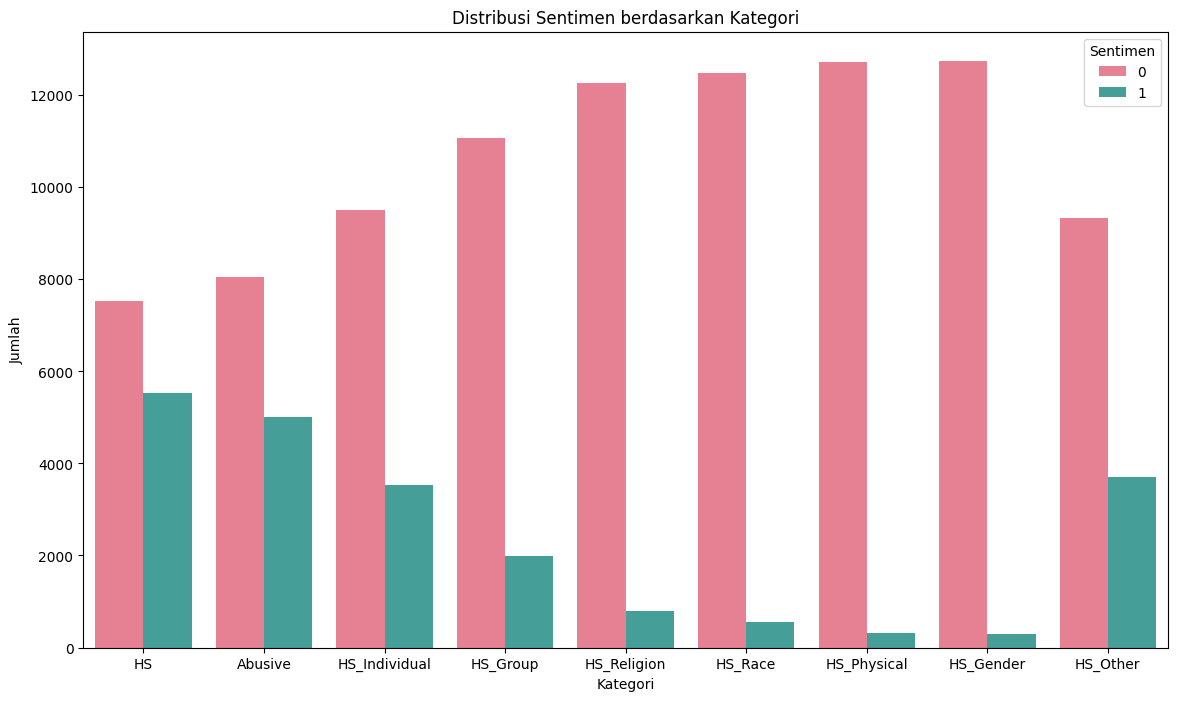

In [364]:
# Melting data frame
melted_df = df_data[['HS','Abusive','HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']].melt()

# Visualisasi distribusi sentimen berdasarkan kategori
plt.figure(figsize=(14, 8))
sns.countplot(data=melted_df, x='variable', hue='value', palette='husl')
plt.title('Distribusi Sentimen berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.legend(title='Sentimen')
plt.show()


In [ ]:
#wordclod berdasarkan produk

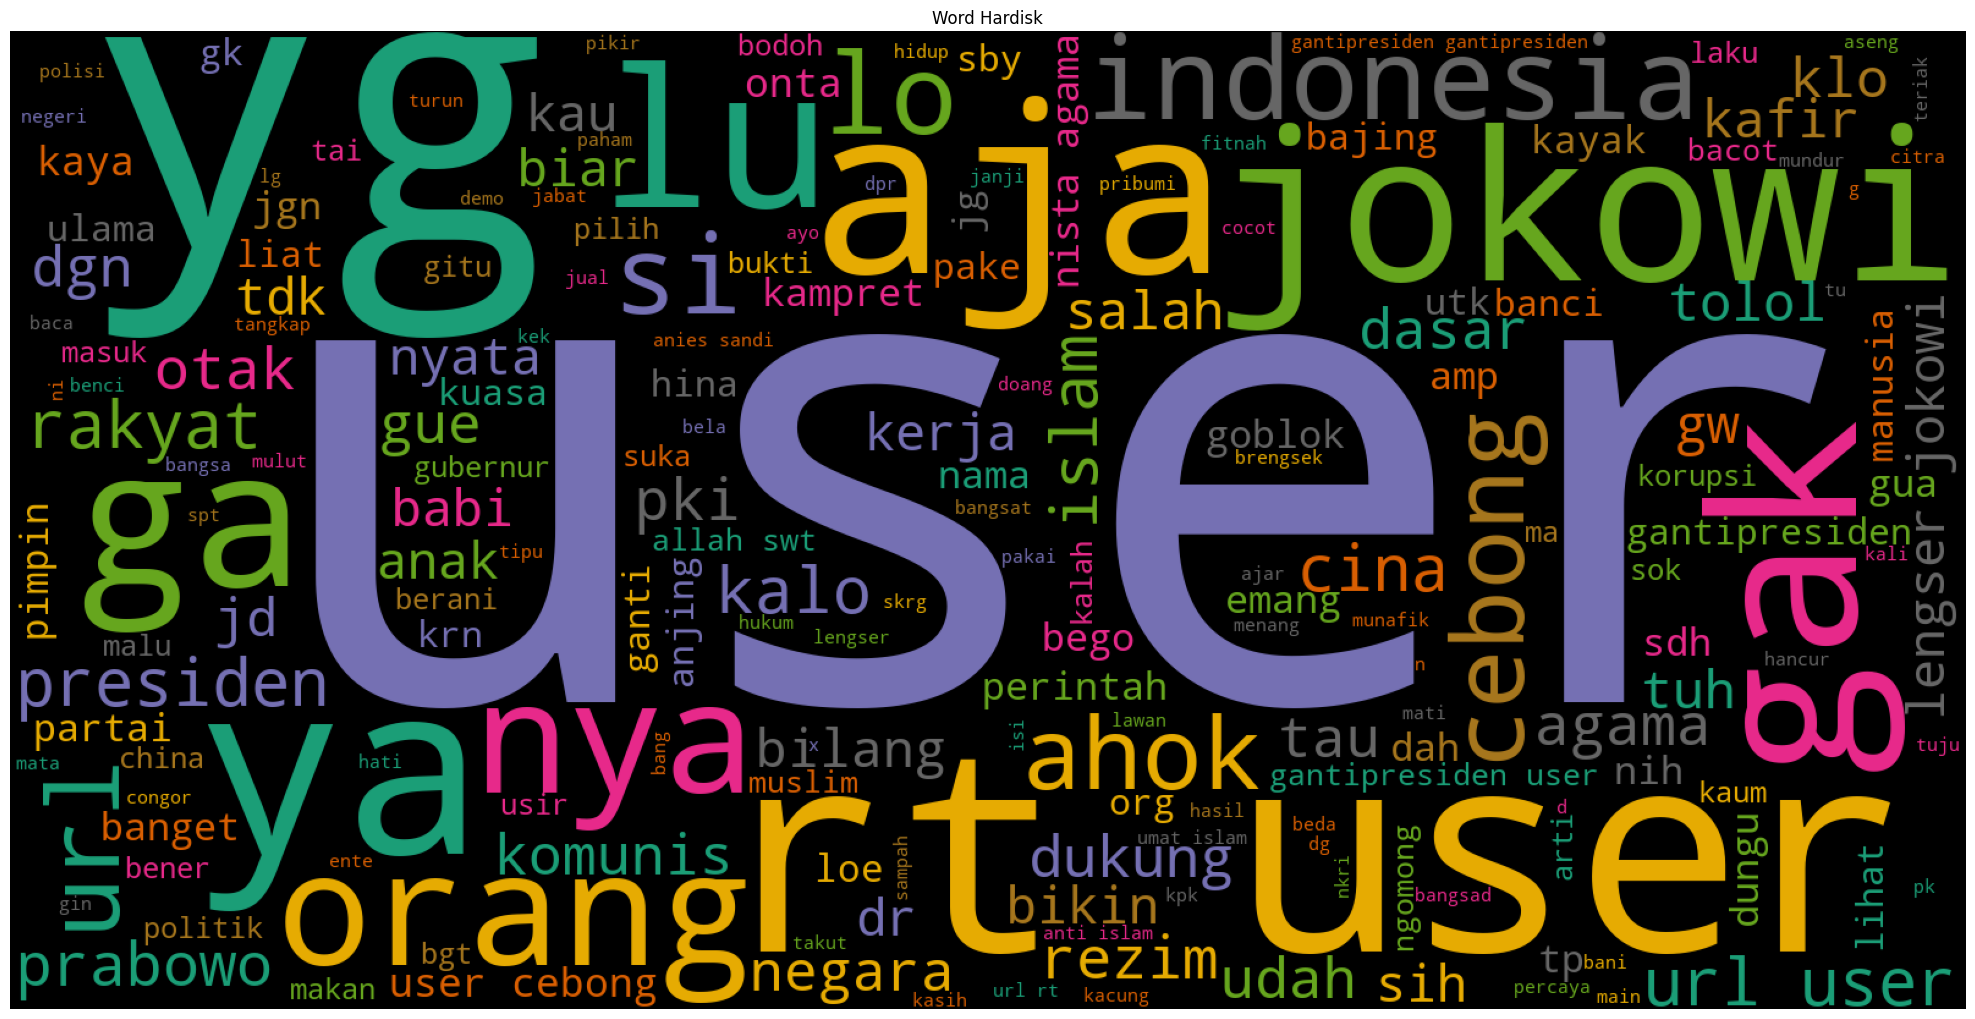

In [366]:
data_ = new_data_clean.loc[(new_data_clean['HS'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

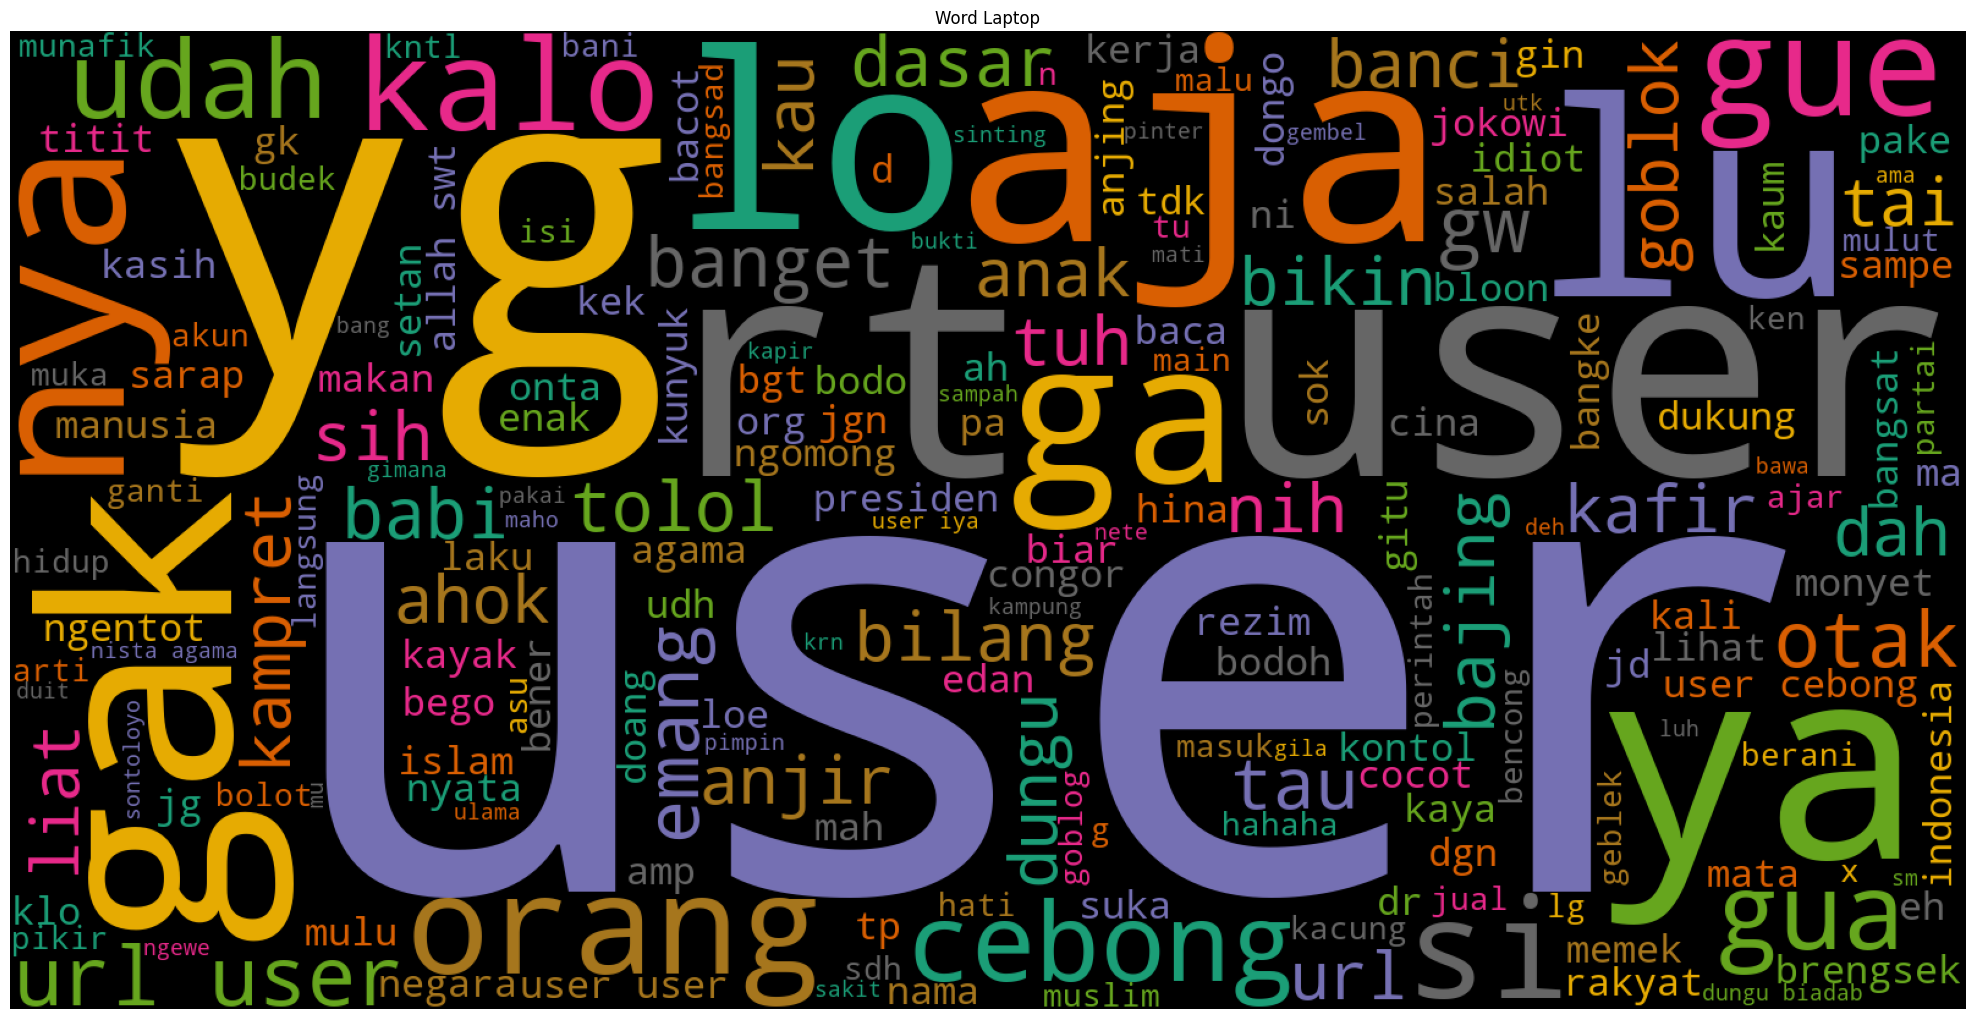

In [367]:
data_ = new_data_clean.loc[(new_data_clean['Abusive'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

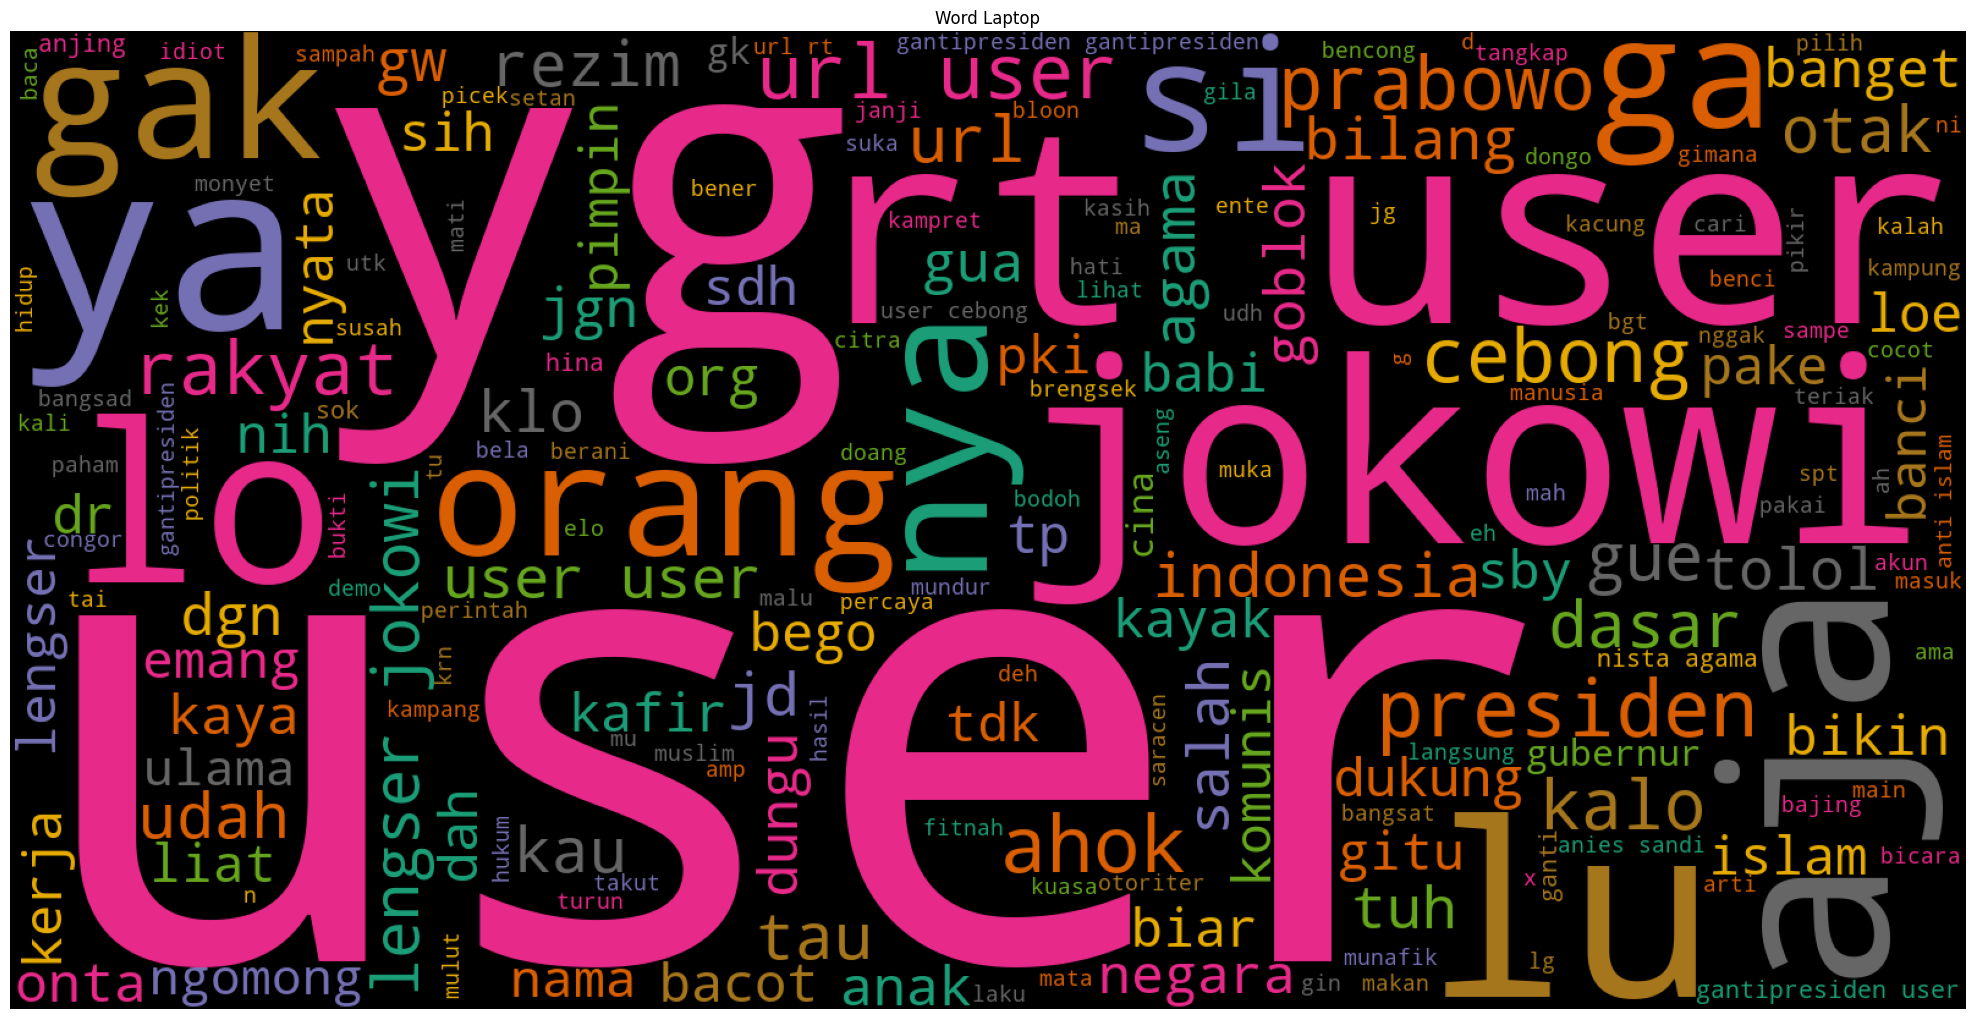

In [368]:
data_ = new_data_clean.loc[(new_data_clean['HS_Individual'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

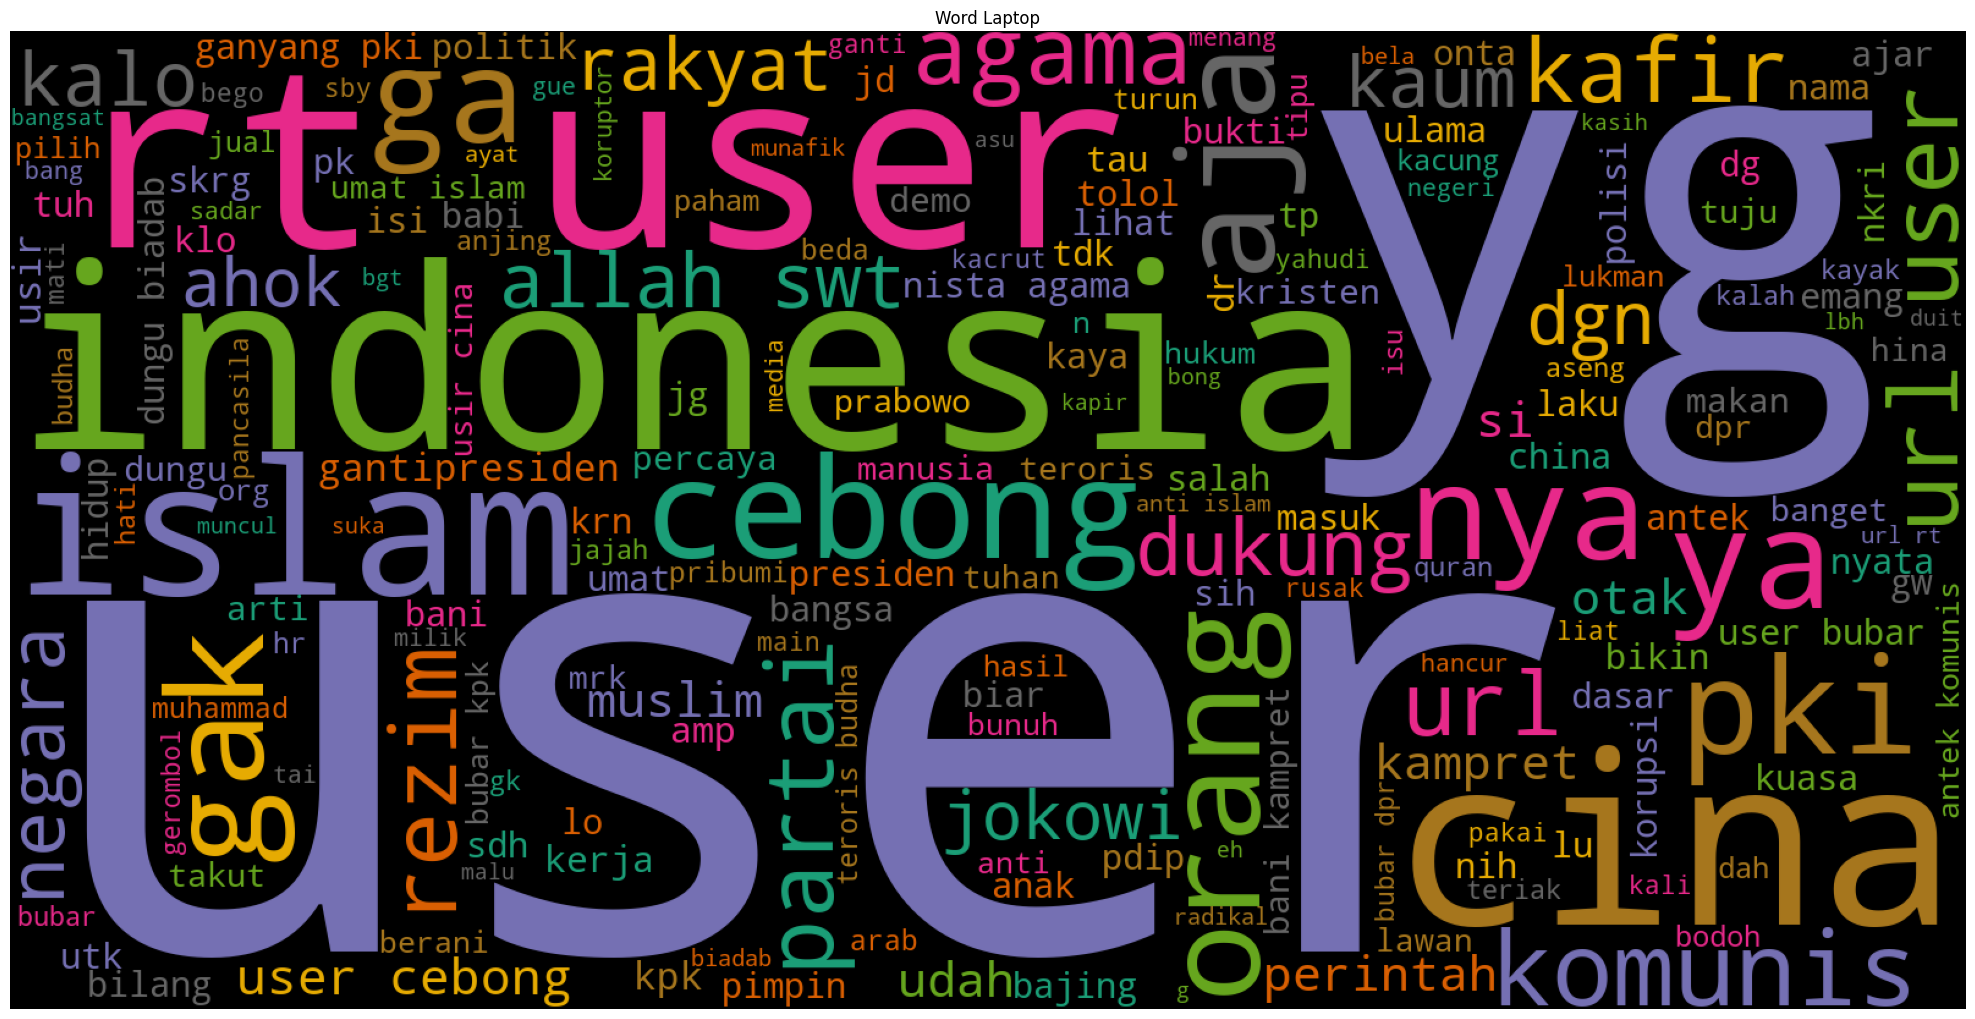

In [369]:
data_ = new_data_clean.loc[(new_data_clean['HS_Group'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

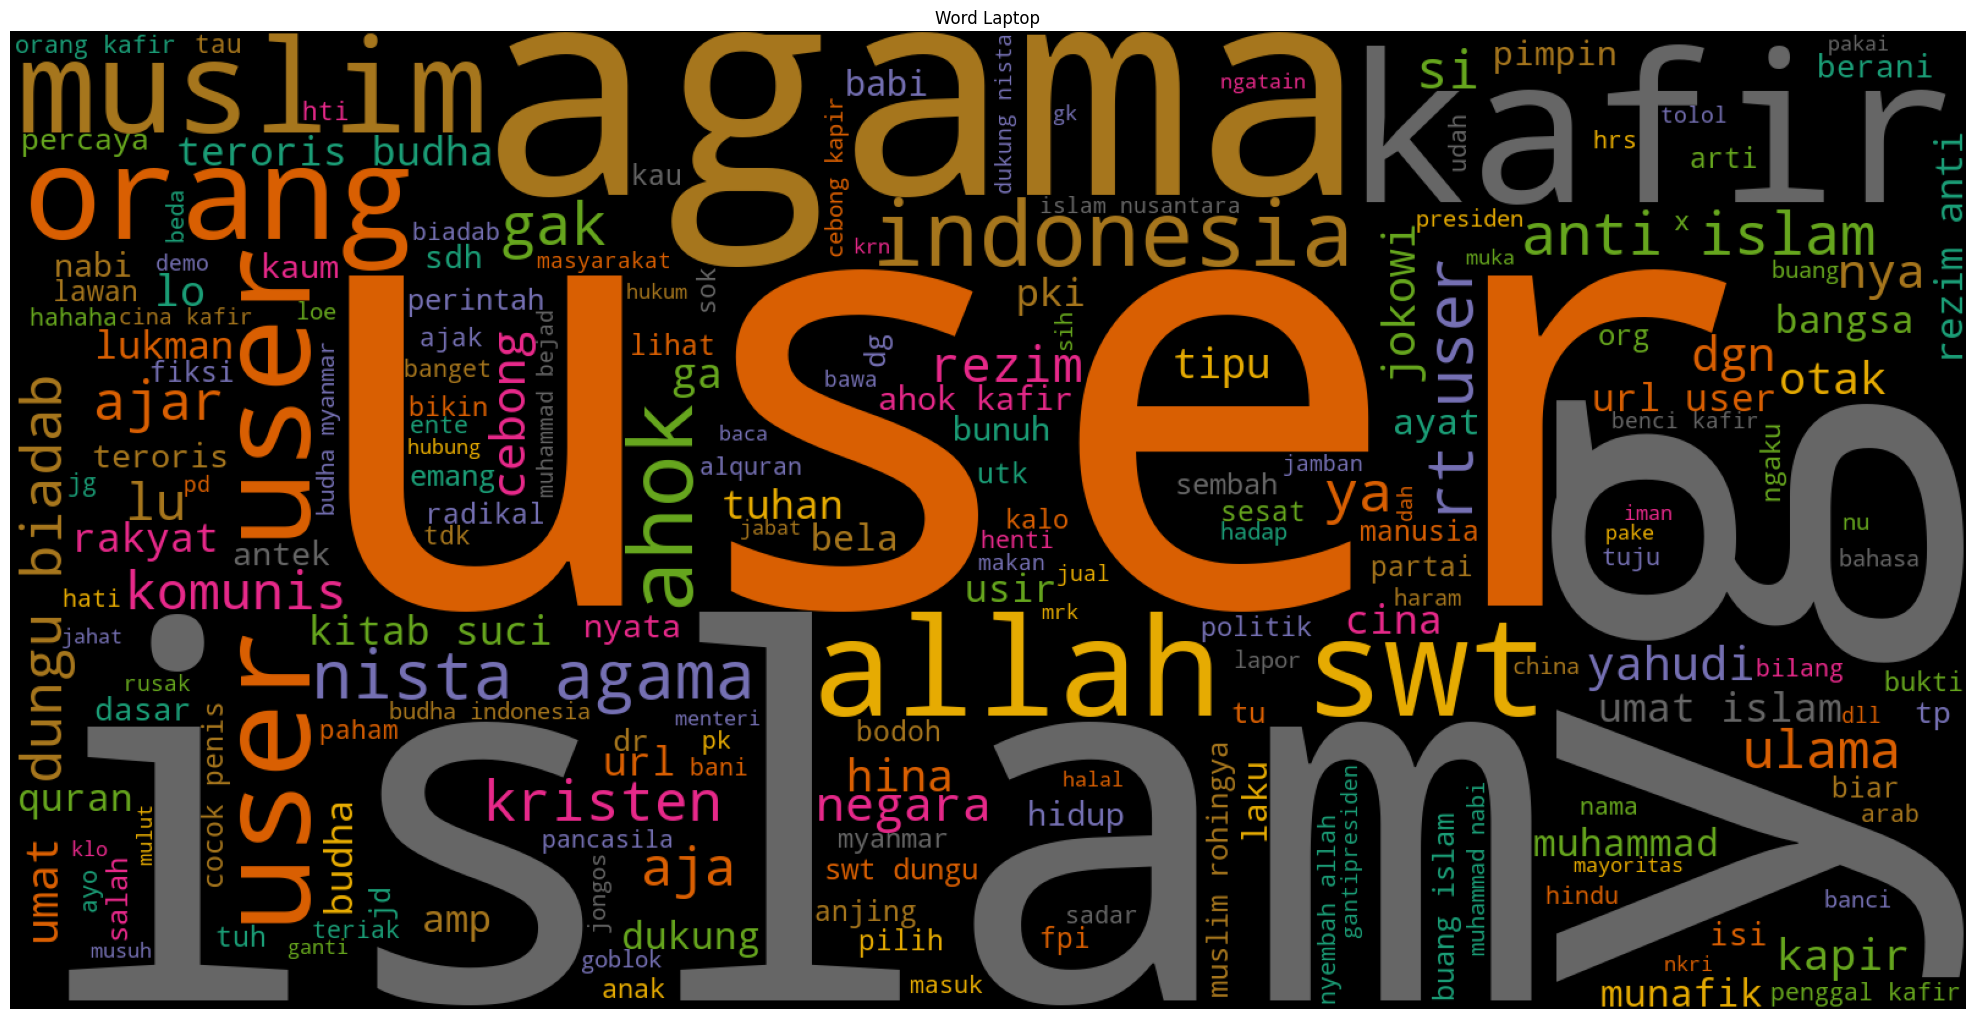

In [370]:
data_ = new_data_clean.loc[(new_data_clean['HS_Religion'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

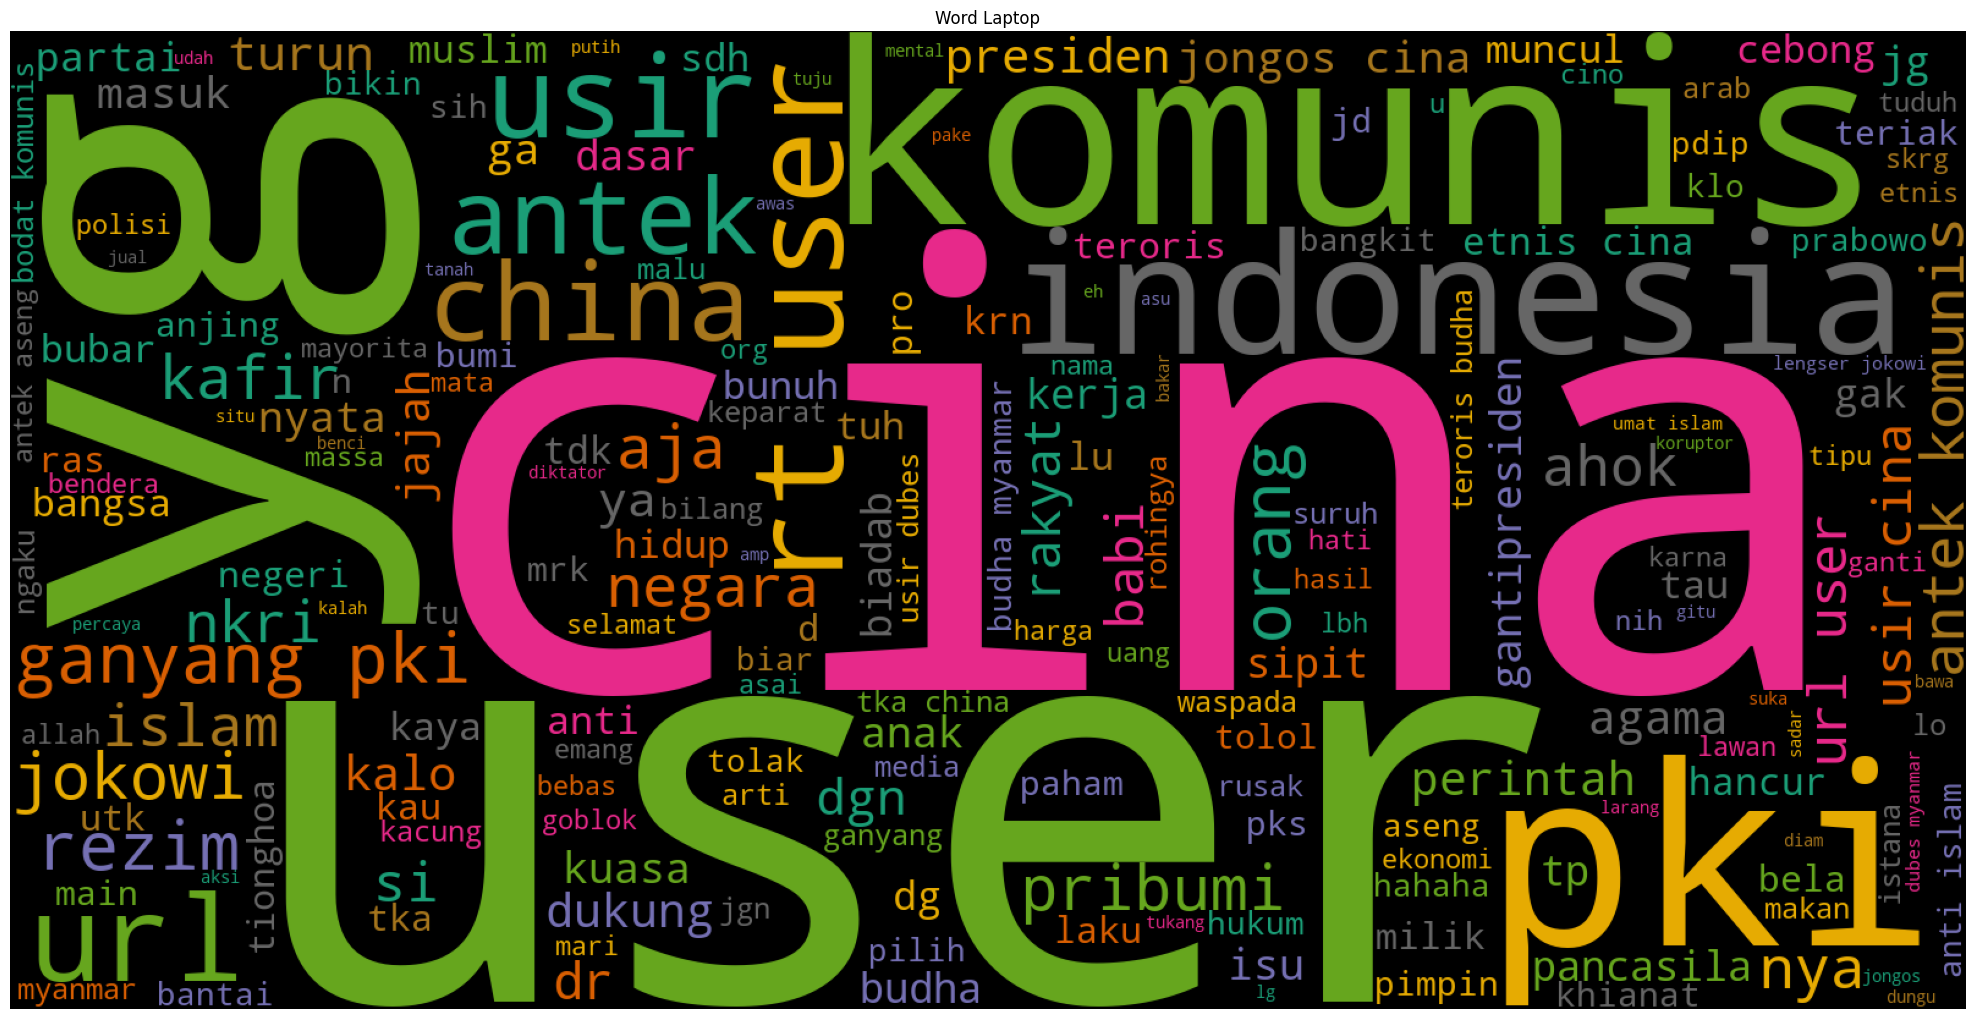

In [371]:
data_ = new_data_clean.loc[(new_data_clean['HS_Race'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

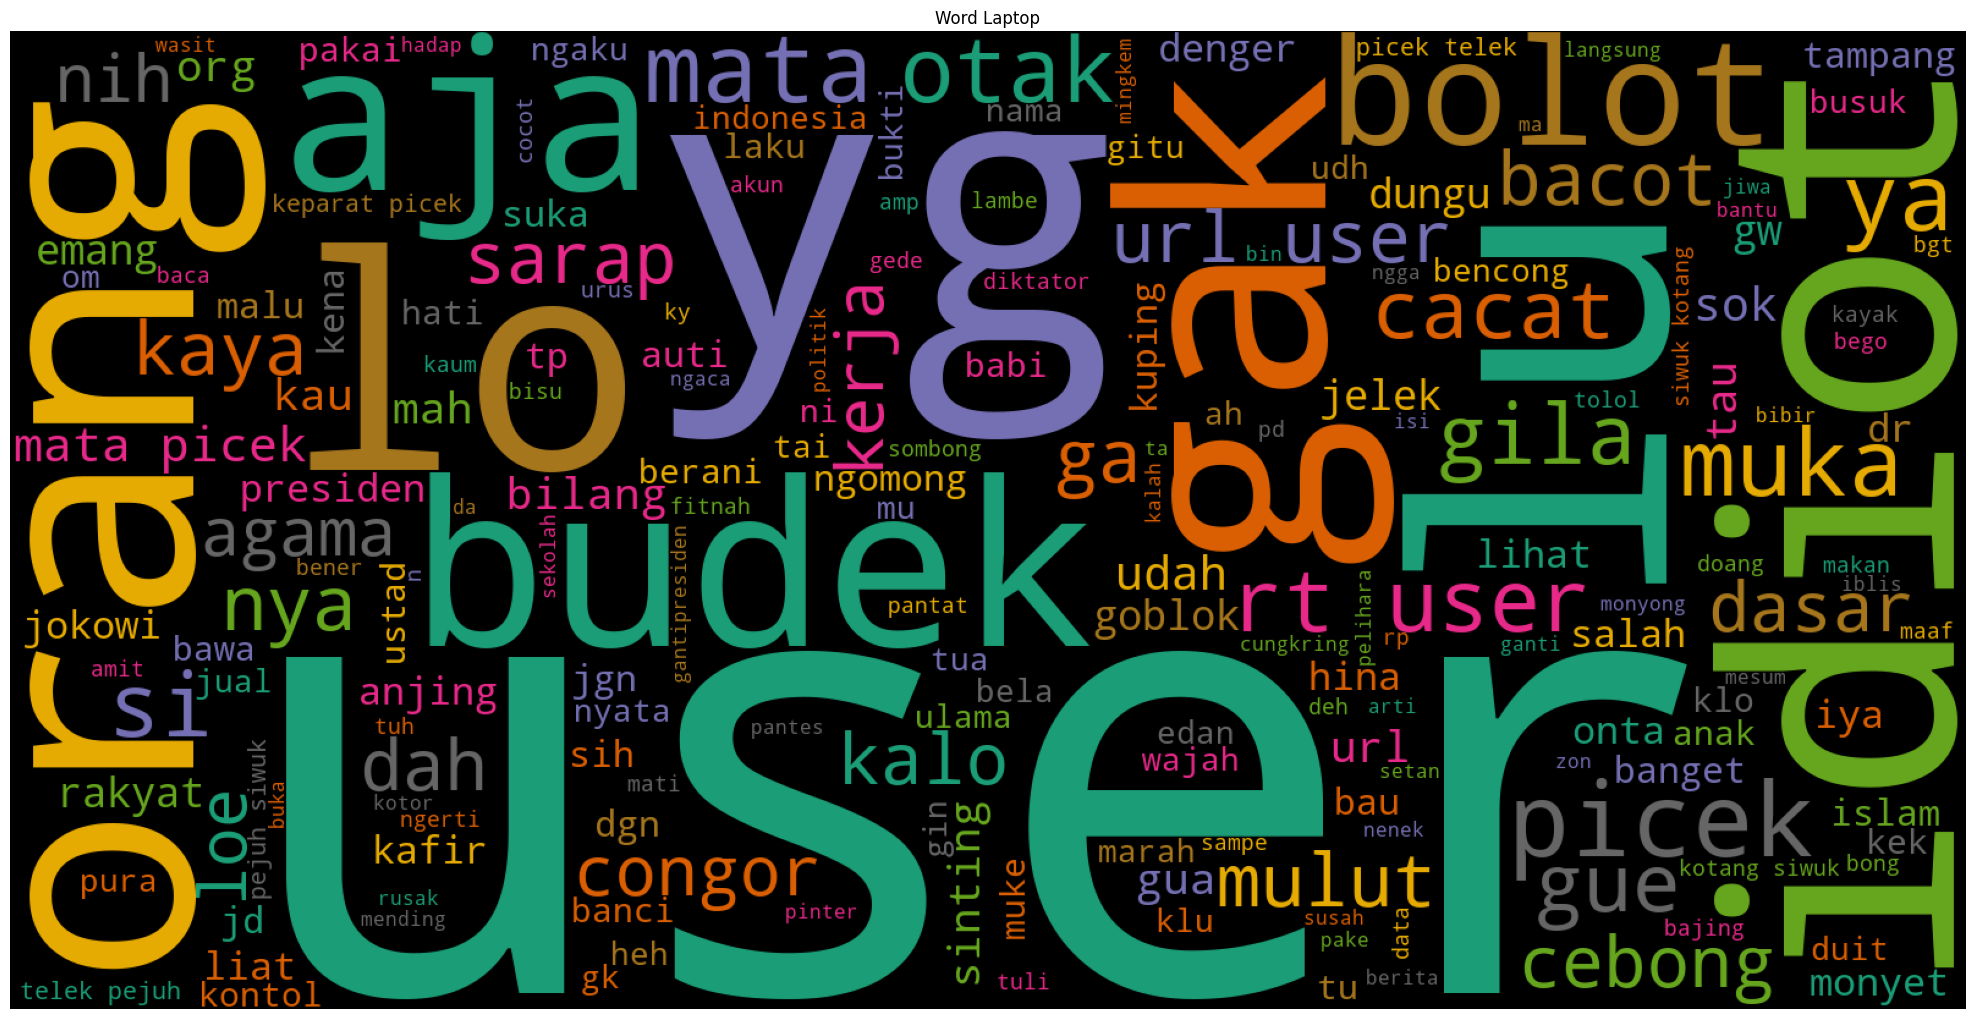

In [372]:
data_ = new_data_clean.loc[(new_data_clean['HS_Physical'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

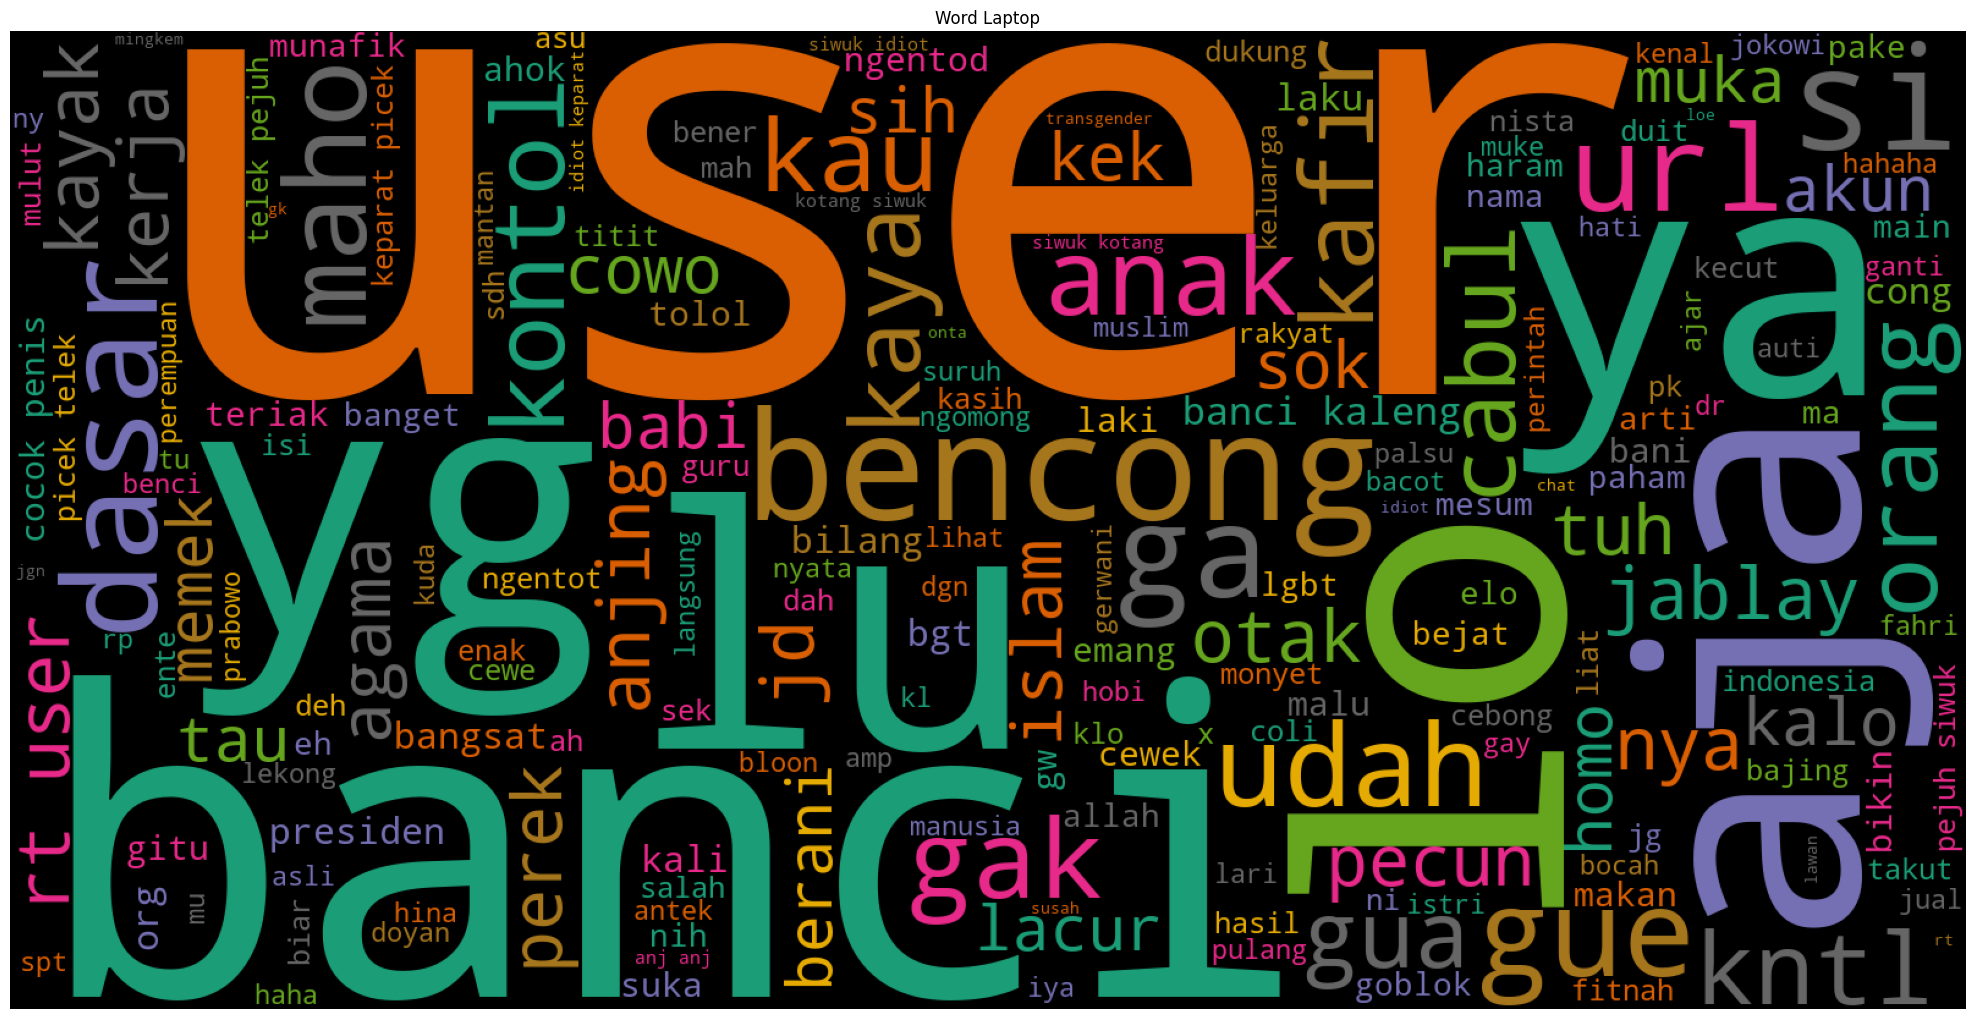

In [373]:
data_ = new_data_clean.loc[(new_data_clean['HS_Gender'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

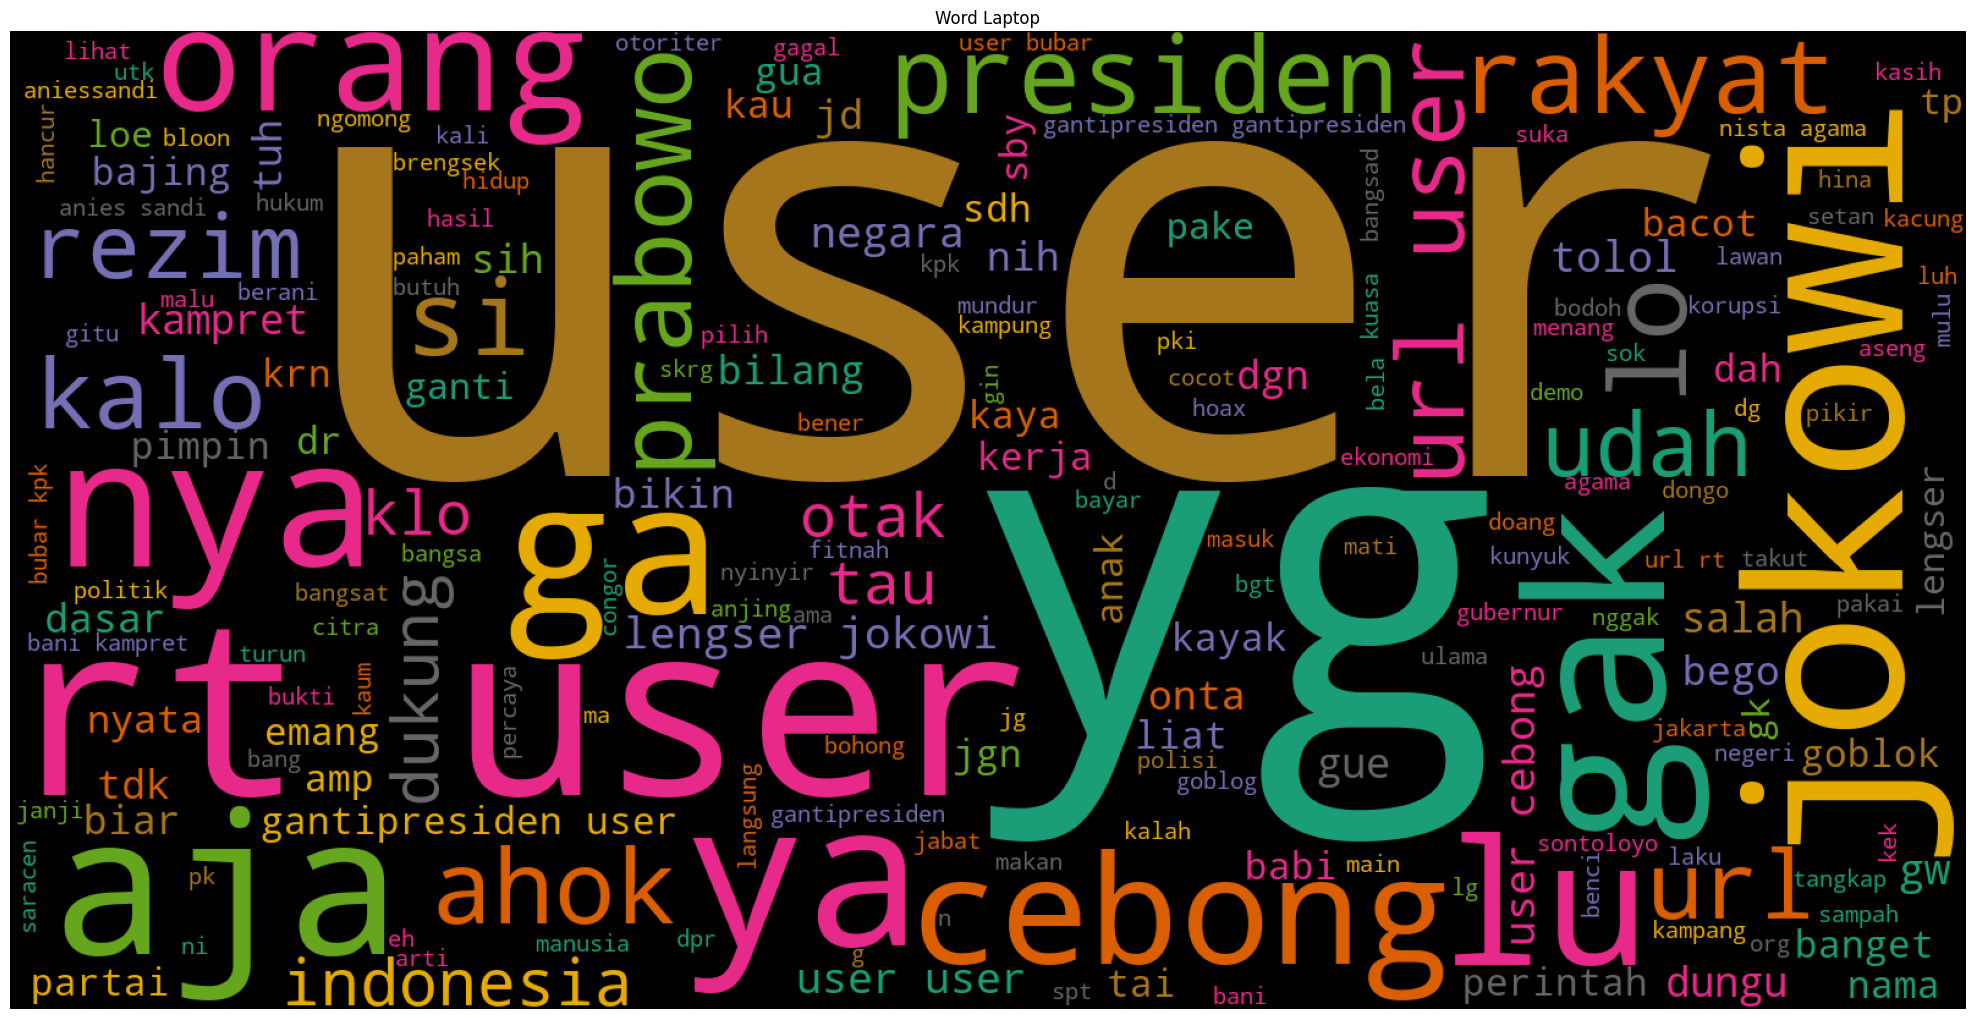

In [374]:
data_ = new_data_clean.loc[(new_data_clean['HS_Other'] == 1)]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()